In [1]:
## importing opencv library
import cv2

In [2]:
## importing matplotlib.pyplot
import matplotlib.pyplot as plt

In [3]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [4]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [5]:
## Obtaining the list of classlabels that our model will be able to detect 
classLabels = [] # empty list of python
file_name = 'Label.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')   ## classLabels.append(fpt.read())

In [6]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
print(len(classLabels))

80


## Setting input sizes

In [8]:
## setting up the following parameters as per mentioned in the config_file
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2= 127.5
model.setInputMean((127.5,127.5,127.5)) # mobilenet => [-1,1]
model.setInputSwapRB(True)

<dnn_Model 0F4FC910>

## Reading Image

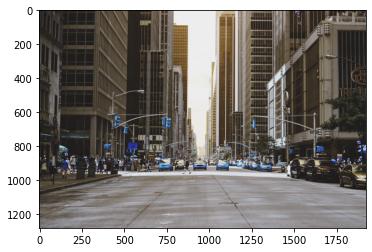

In [9]:
img1='Images\Players.jpg'
img2='Images\Street.jpg'

image = cv2.imread(img2)

plt.imshow(image)

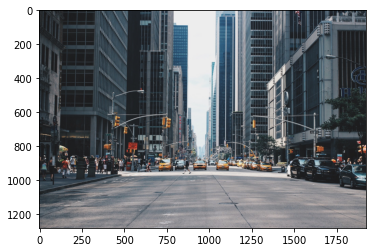

In [10]:
## as the image will be read in BGR channel by default, therefore converting it to RGB.
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB)) 

## Testing Model On Image

In [11]:
ClassIndex, confidence, bbox = model.detect(image,confThreshold=0.55)
   
for i in range(len(ClassIndex)):
    print(ClassIndex[i][0], classLabels[ClassIndex[i][0]-1])

1 person
3 car
1 person
1 person
3 car
3 car
10 traffic light
3 car
10 traffic light
1 person
3 car
3 car
1 person
3 car
10 traffic light
1 person
1 person
3 car


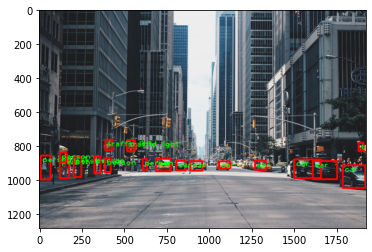

In [12]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
    
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(), bbox):
    #cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)
    cv2.rectangle(image, boxes, (0,0,255), 10)
    cv2.putText(image, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness=3 )
    
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
   

## Testing Model On Video

In [13]:
cap = cv2.VideoCapture('traffic-mini.mp4')

# Check if the video is opened correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError('Cannot open video')

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)
    
    for i in range(len(ClassIndex)):
        print(ClassIndex[i][0], classLabels[ClassIndex[i][0]-1])
        
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd<=80):
                cv2.rectangle(frame, boxes, (0,0,255), 3)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0, 255, 0), thickness=3 )  
                cv2.putText(frame,str(round(conf*100,2)),(boxes[0]+200,boxes[1]+30),cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)


    cv2.imshow('Object Detection Tutorial', frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

6 bus
6 bus
6 bus
3 car
3 car
1 person
6 bus
6 bus
6 bus
3 car
3 car
1 person
1 person
6 bus
6 bus
6 bus
3 car
3 car
1 person
6 bus
6 bus
6 bus
3 car
3 car
1 person
6 bus
6 bus
6 bus
3 car
3 car
1 person
6 bus
6 bus
6 bus
3 car
3 car
1 person
6 bus
6 bus
6 bus
3 car
3 car
1 person
6 bus
6 bus
6 bus
1 person
1 person
6 bus
6 bus
6 bus
1 person
1 person
3 car
6 bus
6 bus
6 bus
1 person
1 person
6 bus
6 bus
6 bus
1 person
1 person
6 bus
6 bus
6 bus
1 person
1 person
6 bus
6 bus
6 bus
1 person
1 person
3 car
6 bus
6 bus
6 bus
1 person
6 bus
6 bus
6 bus
1 person
3 car
3 car
6 bus
6 bus
6 bus
6 bus
1 person
3 car
6 bus
6 bus
6 bus
1 person
6 bus
3 car
6 bus
6 bus
6 bus
6 bus
1 person
3 car
6 bus
6 bus
6 bus
6 bus
1 person
3 car
6 bus
6 bus
6 bus
6 bus
1 person
3 car
6 bus
6 bus
6 bus
3 car
6 bus
1 person
6 bus
6 bus
6 bus
3 car
1 person
6 bus
6 bus
6 bus
6 bus
3 car
1 person
6 bus
6 bus
6 bus
6 bus
3 car
6 bus
1 person
6 bus
6 bus
6 bus
6 bus
6 bus
3 car
1 person
1 person
6 bus
6 bus
6 bus
3